In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
data = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,owns vehicle,after 2015,unmarried,has child,10238,12000.000000,sedan,0,0,0,no
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no vehicle,before 2015,unmarried,no child,10238,16000.000000,sedan,0,0,0,yes
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,owns vehicle,before 2015,unmarried,no child,10238,11000.000000,sedan,0,0,0,no
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,owns vehicle,before 2015,unmarried,has child,32765,11000.000000,sedan,0,0,0,no
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,owns vehicle,before 2015,unmarried,no child,32765,12000.000000,sedan,2,0,1,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  object 
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  object 
 11  CHILDREN             10000 non-null  object 
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
data.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.000000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.239200,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.554990,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.000000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.000000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.000000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.000000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.000000,15.000000


In [6]:
data.shape

(10000, 19)

# Remove Insignificant Variables

In [7]:
data.drop('ID',axis=1,inplace=True) 

In [8]:
data.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,owns vehicle,after 2015,unmarried,has child,10238,12000.000000,sedan,0,0,0,no
1,16-25,male,majority,0-9y,none,poverty,0.357757,no vehicle,before 2015,unmarried,no child,10238,16000.000000,sedan,0,0,0,yes
2,16-25,female,majority,0-9y,high school,working class,0.493146,owns vehicle,before 2015,unmarried,no child,10238,11000.000000,sedan,0,0,0,no
3,16-25,male,majority,0-9y,university,working class,0.206013,owns vehicle,before 2015,unmarried,has child,32765,11000.000000,sedan,0,0,0,no
4,26-39,male,majority,10-19y,none,working class,0.388366,owns vehicle,before 2015,unmarried,no child,32765,12000.000000,sedan,2,0,1,yes


# OUTLIERS ANALYSIS

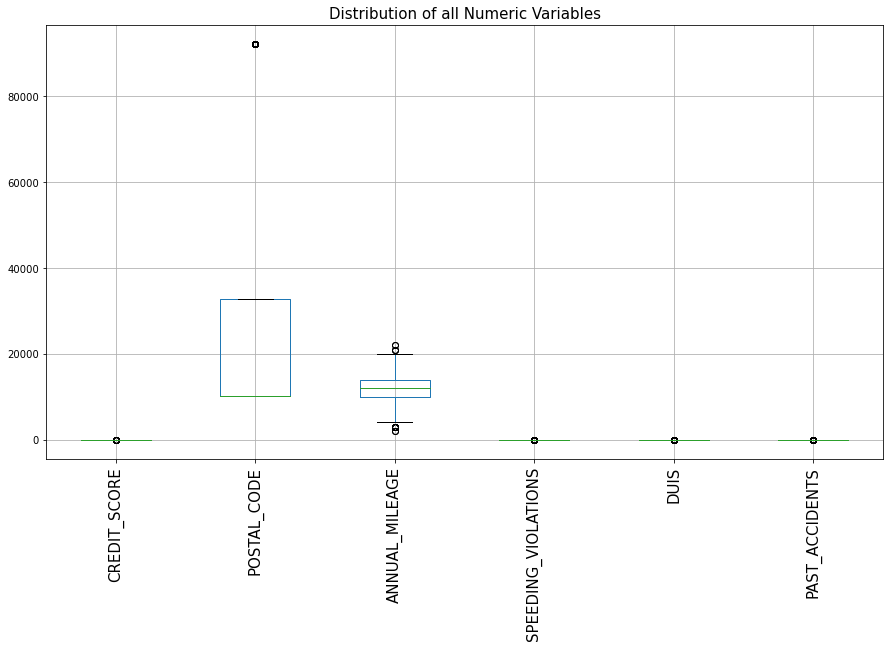

In [9]:
plt.figure(figsize = (15,8))


data.boxplot()


plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [10]:
data.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

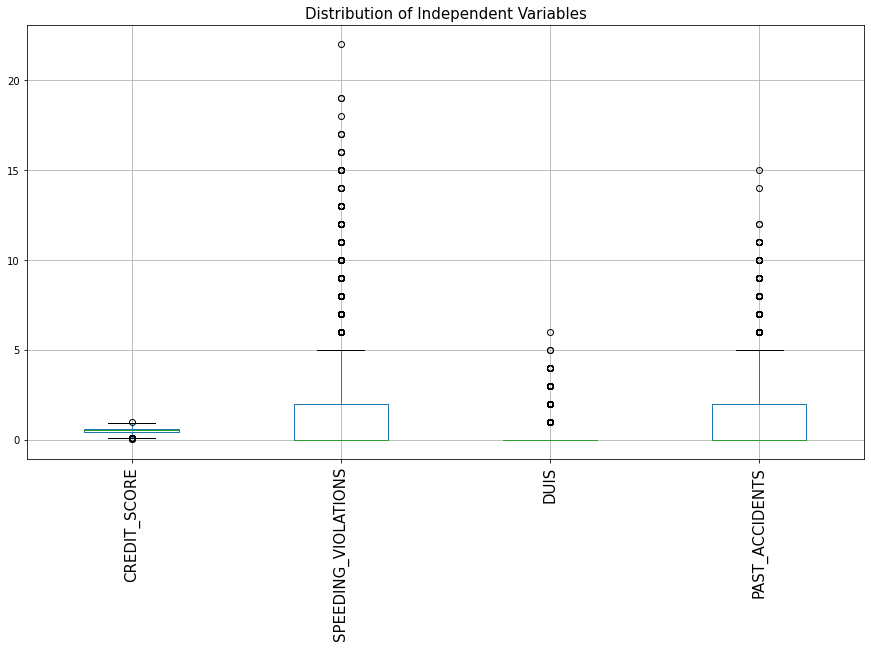

In [11]:
plt.figure(figsize = (15,8))
data.loc[:,['CREDIT_SCORE','SPEEDING_VIOLATIONS', 'DUIS','PAST_ACCIDENTS']].boxplot()


plt.title('Distribution of Independent Variables', fontsize = 15)


plt.xticks(rotation = 'vertical', fontsize = 15)


plt.show()

In [12]:
# calculate the first quartile
#Q1 = data.quantile(0.25)

# calculate the third quartile
#Q3 = data.quantile(0.75)

#IQR = Q3 - Q1

#data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


#data.shape

# MISSING VALUES TREATMENT

In [13]:
missing_value_percentage = data. isnull(). sum() * 100 / len(data)
missing_value_percentage

AGE                   0.000000
GENDER                0.000000
RACE                  0.000000
DRIVING_EXPERIENCE    0.000000
EDUCATION             0.000000
INCOME                0.000000
CREDIT_SCORE          9.820000
VEHICLE_OWNERSHIP     0.000000
VEHICLE_YEAR          0.000000
MARRIED               0.000000
CHILDREN              0.000000
POSTAL_CODE           0.000000
ANNUAL_MILEAGE        9.570000
VEHICLE_TYPE          0.000000
SPEEDING_VIOLATIONS   0.000000
DUIS                  0.000000
PAST_ACCIDENTS        0.000000
OUTCOME               0.000000
dtype: float64

In [14]:
data.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

# CREDIT_SCORE feature

In [15]:
data['CREDIT_SCORE'].mean()

0.5158128096021279

In [16]:
data['CREDIT_SCORE'].median()

0.5250327585000001

In [17]:
data['CREDIT_SCORE']=data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].mean())

# ANNUAL_MILEAGE feature

In [18]:
data['ANNUAL_MILEAGE'].mean()

11697.003206900365

In [19]:
data['ANNUAL_MILEAGE'].median()

12000.0

In [20]:
data['ANNUAL_MILEAGE']=data['ANNUAL_MILEAGE'].fillna(data['ANNUAL_MILEAGE'].mean())

In [21]:
data.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

# Univariate analysis


<AxesSubplot:title={'center':'Outcome Count'}, xlabel='OUTCOME', ylabel='count'>

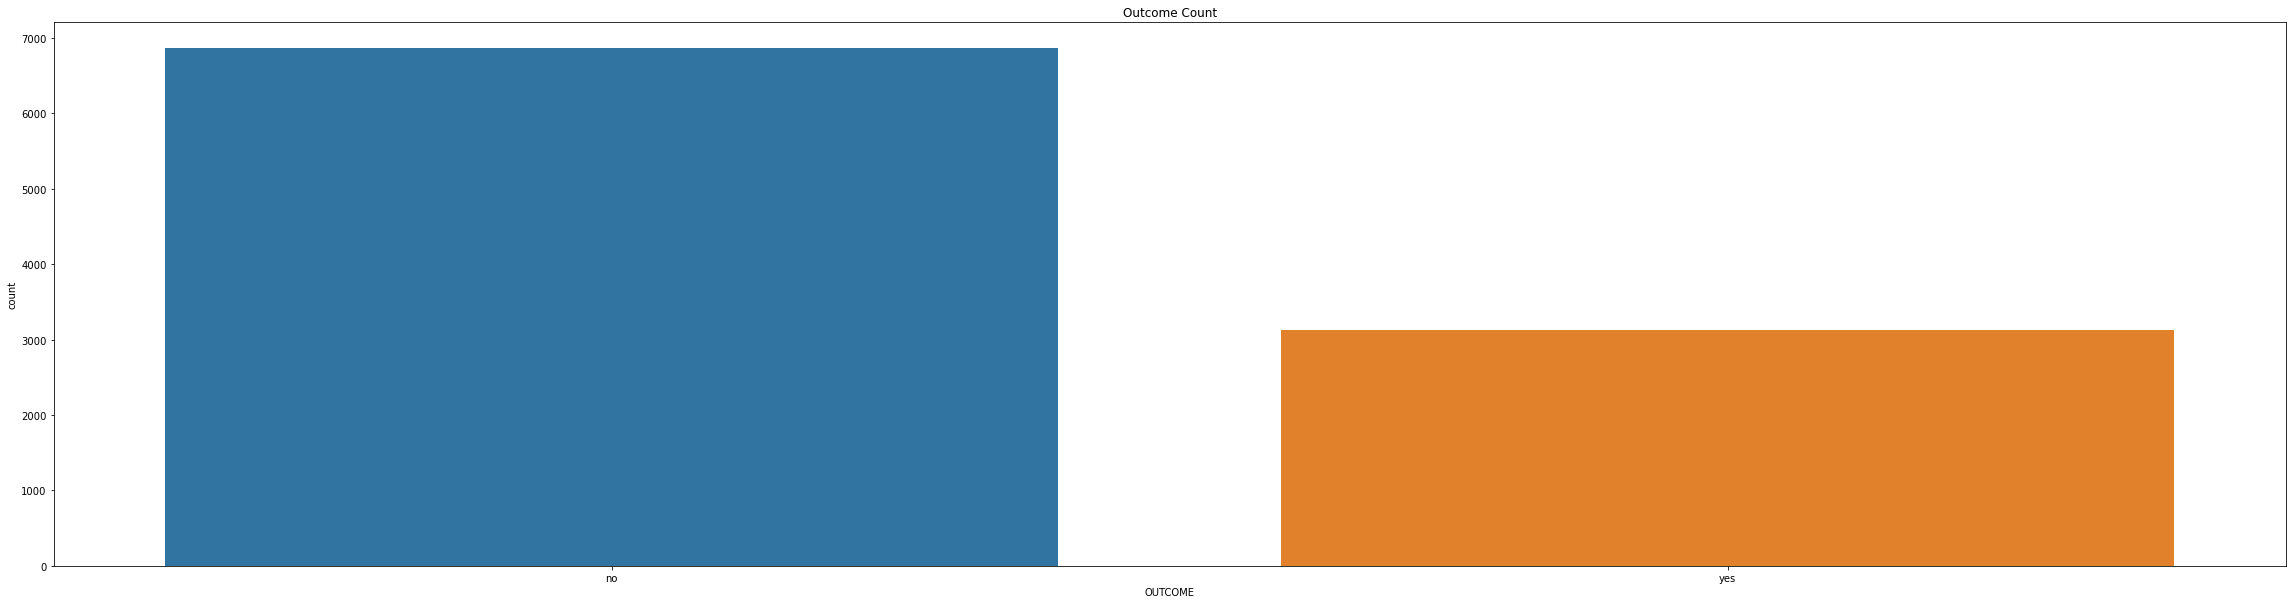

In [22]:
plt.figure(figsize=(40,10))
plt.title('Outcome Count')
sns.countplot(data=data, x ='OUTCOME')

<AxesSubplot:xlabel='GENDER', ylabel='count'>

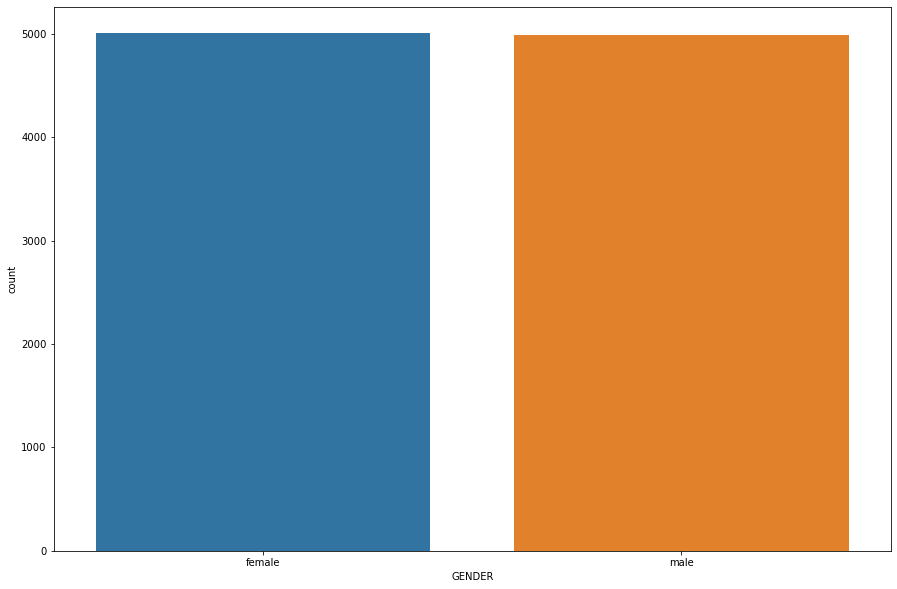

In [23]:
sns.countplot(x = 'GENDER', data = data)

<AxesSubplot:xlabel='AGE', ylabel='count'>

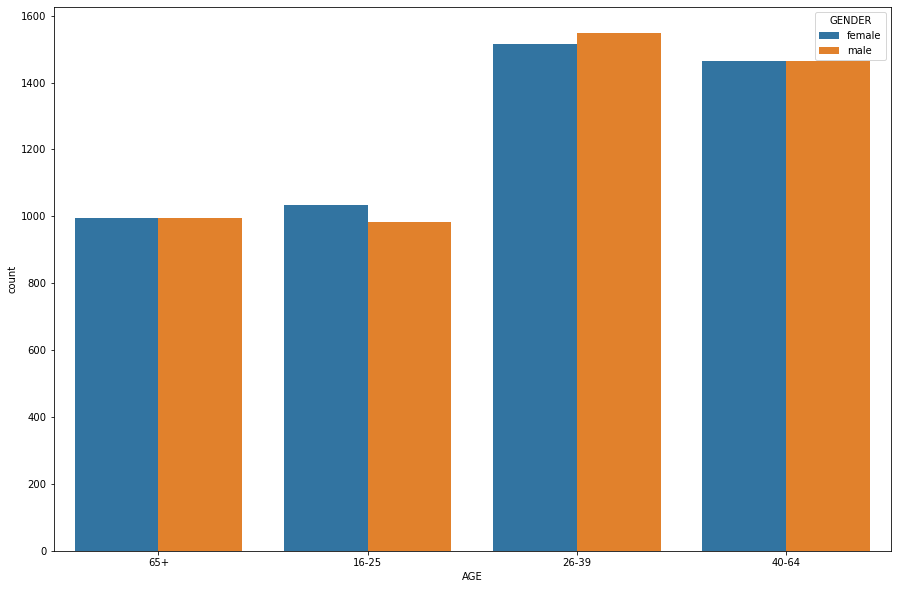

In [24]:
sns.countplot(x= 'AGE', data= data, hue= 'GENDER')

<AxesSubplot:xlabel='ANNUAL_MILEAGE'>

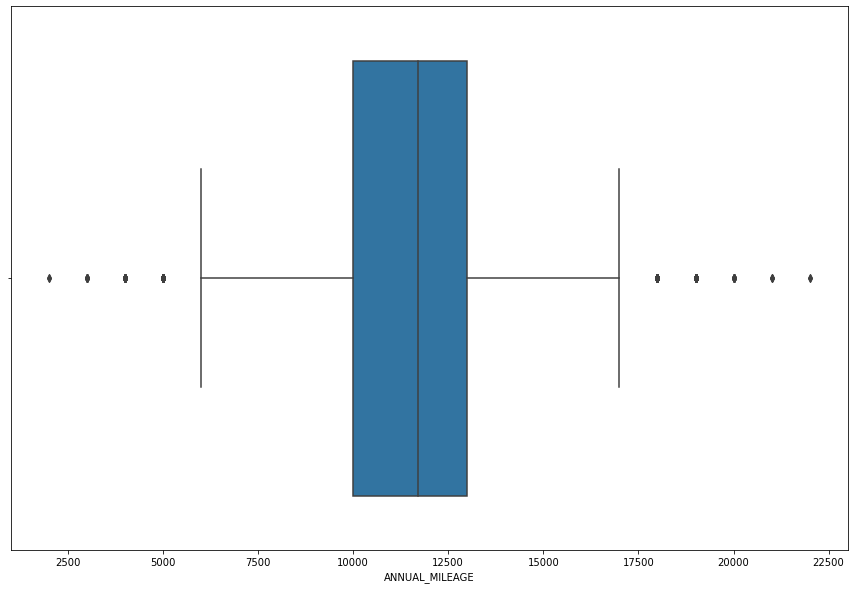

In [25]:
sns.boxplot(data['ANNUAL_MILEAGE'])

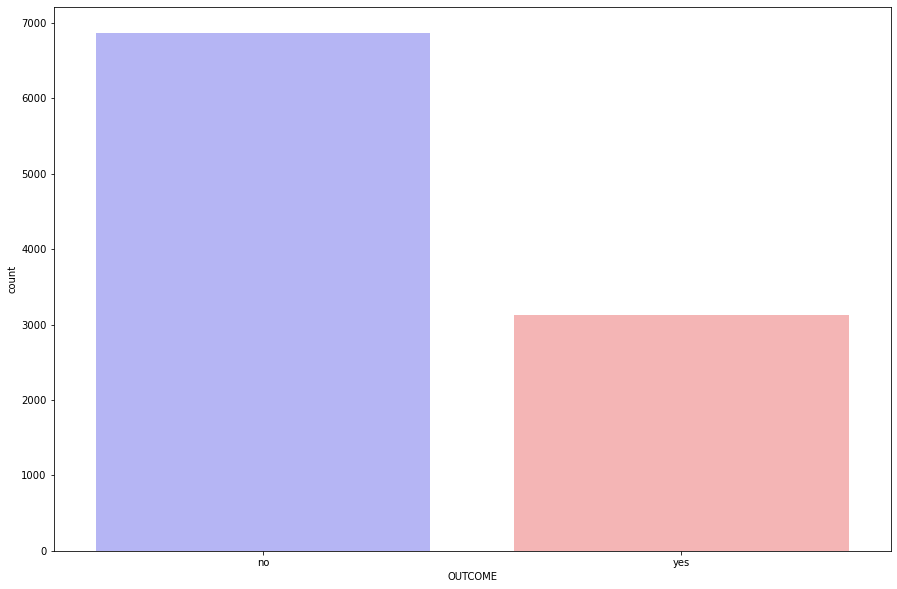

In [26]:
sns.countplot(x="OUTCOME", data=data, palette="bwr")
plt.show()

In [27]:
dont_claim_loan = len(data[data.OUTCOME == 1])
claim_loan = len(data[data.OUTCOME == 0])
print("Percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(data.OUTCOME))*100)))
print("Percentage of people who did not apply for a loan: {:.2f}%".format((claim_loan / (len(data.OUTCOME))*100)))

Percentage of people who apply for a loan: 0.00%
Percentage of people who did not apply for a loan: 0.00%


(6.5, -0.5)

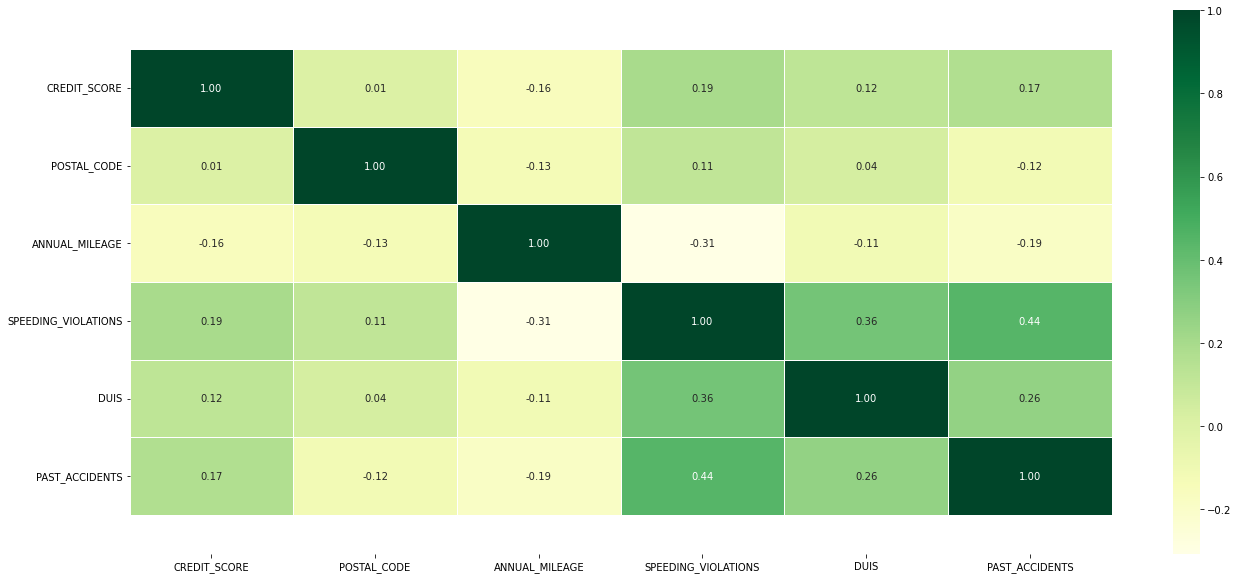

In [28]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [29]:
data["AGE"].replace({"16-25": "Young", "26-39": "Middle_Age","40-64":"Old","65+":"Very_Old"}, inplace=True)


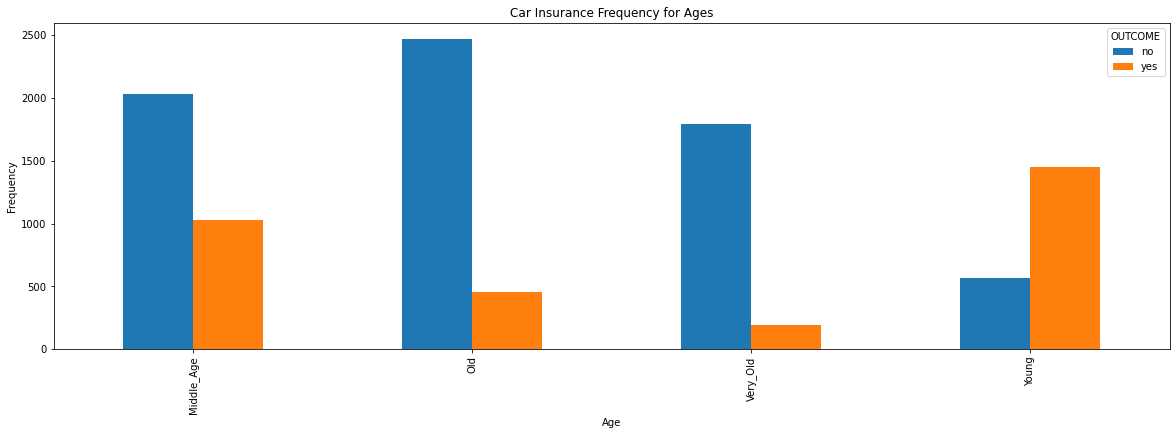

In [30]:
pd.crosstab(data.AGE,data.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('Car Insurance Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

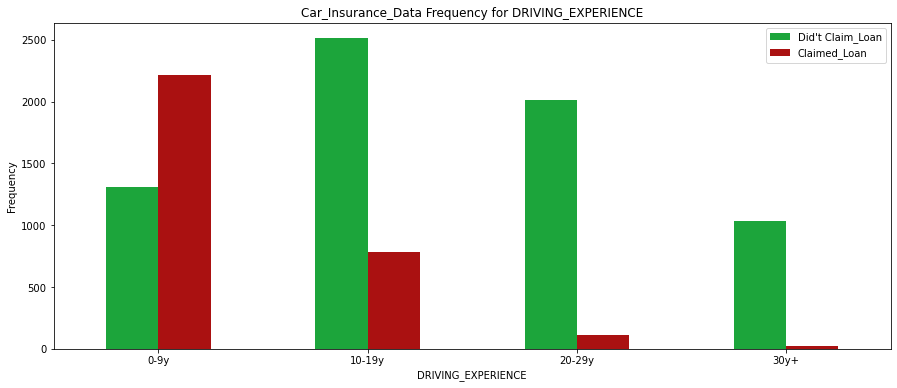

In [31]:
pd.crosstab(data.DRIVING_EXPERIENCE,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for DRIVING_EXPERIENCE')
plt.xlabel('DRIVING_EXPERIENCE')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

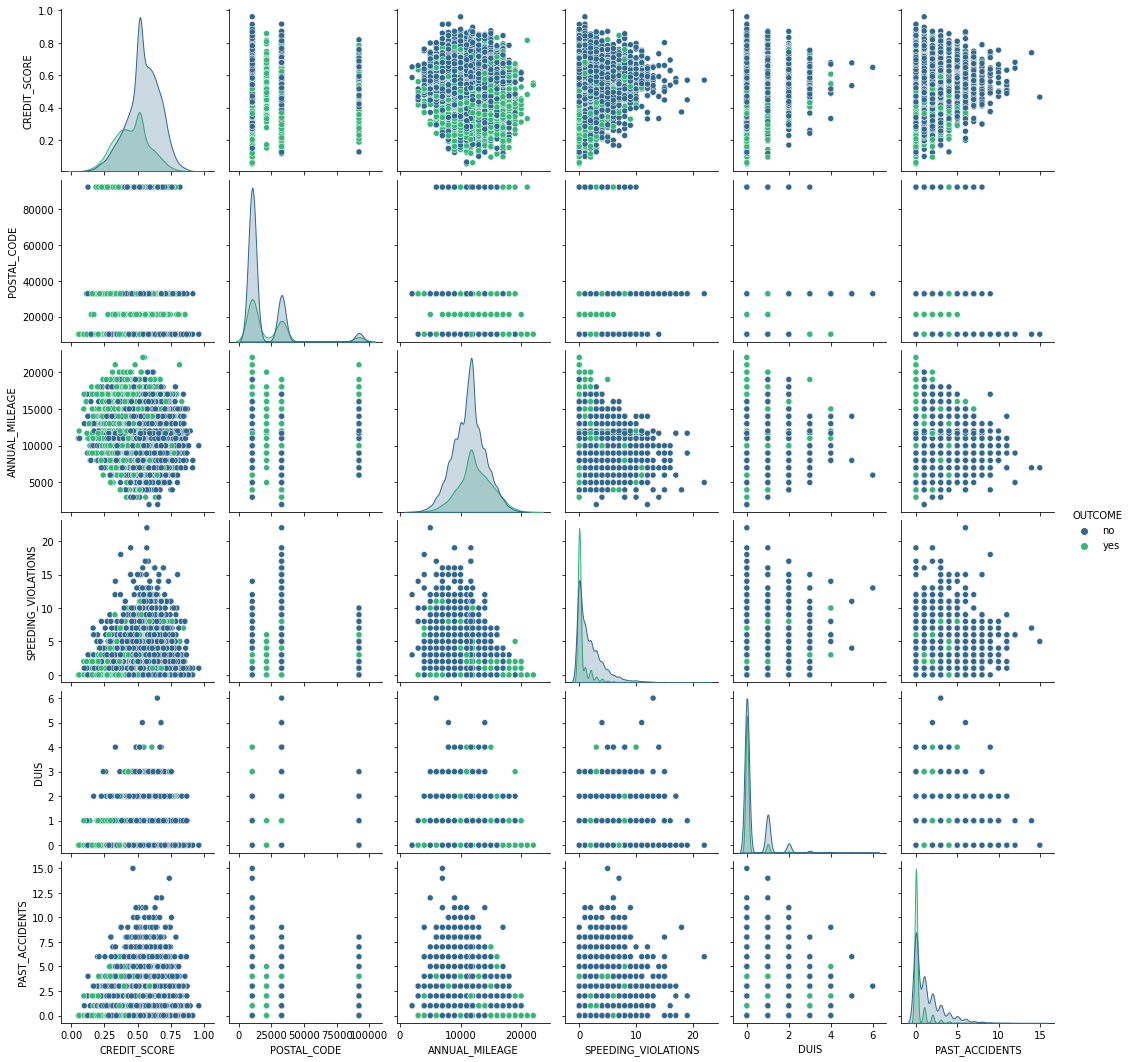

In [32]:
sns.pairplot(data, hue="OUTCOME", palette="viridis");

# Feature engineering 

In [33]:
#all feature without target var
data_feature = data.drop('OUTCOME', axis = 1)

In [34]:
#cat
data_cat=data_feature.select_dtypes(include=np.object)

In [35]:
data_cat.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
       'VEHICLE_TYPE'],
      dtype='object')

In [36]:
#num
data_numarical=data_feature.select_dtypes(include=np.number)

In [37]:
data_numarical.columns

Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

### Checking class imbalance

In [38]:
data['OUTCOME'].value_counts()

no     6867
yes    3133
Name: OUTCOME, dtype: int64

In [39]:
data['OUTCOME']=data['OUTCOME'].map({'no':0,'yes':1})

In [40]:
#target var
data_target=data['OUTCOME']
data_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: OUTCOME
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

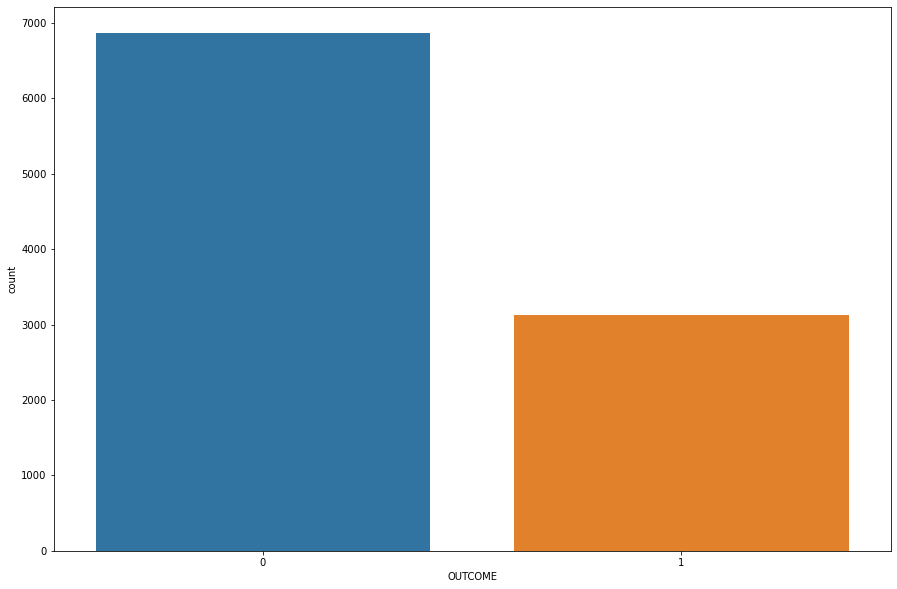

In [71]:
sns.countplot(data['OUTCOME'])

# Encoding for cat

In [41]:
data_dummy_var= pd.get_dummies(data=data_cat,drop_first = True)
data_dummy_var.head()

,AGE_Old,AGE_Very_Old,AGE_Young,GENDER_male,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_OWNERSHIP_owns vehicle,VEHICLE_YEAR_before 2015,MARRIED_unmarried,CHILDREN_no child,VEHICLE_TYPE_sports car
0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0
4,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0


In [42]:
data_dummy_var.shape

(10000, 18)

# SCALING FOR NUM

In [43]:
X_scaler = StandardScaler()


num_scaled = X_scaler.fit_transform(data_numarical)


data_numarical_scaled_var = pd.DataFrame(num_scaled, columns = data_numarical.columns)

In [44]:
data_numarical_scaled_var.shape

(10000, 6)

# Concatenate scaled numerical and dummy encoded categorical variables.

In [45]:
X = pd.concat([data_numarical_scaled_var, data_dummy_var],axis=1)

X.head()

,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_Old,AGE_Very_Old,AGE_Young,GENDER_male,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_OWNERSHIP_owns vehicle,VEHICLE_YEAR_before 2015,MARRIED_unmarried,CHILDREN_no child,VEHICLE_TYPE_sports car
0,0.865914,-0.508946,0.113057,-0.661462,-0.431020,-0.639263,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,-1.208879,-0.508946,1.605576,-0.661462,-0.431020,-0.639263,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0
2,-0.173367,-0.508946,-0.260073,-0.661462,-0.431020,-0.639263,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,-2.369485,0.682034,-0.260073,-0.661462,-0.431020,-0.639263,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0
4,-0.974770,0.682034,0.113057,0.230657,-0.431020,-0.034072,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0


In [46]:
X.shape

(10000, 24)

# Train-Test Split

In [47]:
X = sm.add_constant(X)

In [48]:
X.shape

(10000, 25)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, data_target, random_state = 10, test_size = 0.2)

In [50]:
print(X_train.shape)
#X_test
#Y_train
#Y_test

(8000, 25)


# Handling the class imbalance for train data

In [72]:
from imblearn.combine import SMOTEENN

In [73]:
smt=SMOTEENN()

In [74]:
X_train,Y_train=smt.fit_resample(X_train,Y_train)

In [75]:
Y_train.value_counts()

1    4203
0    3486
Name: OUTCOME, dtype: int64

# BASE MODEL

In [104]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Logistic Regression

In [76]:
logreg = sm.Logit(Y_train, X_train)
result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.148187
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OUTCOME   No. Observations:                 7689
Model:                          Logit   Df Residuals:                     7664
Method:                           MLE   Df Model:                           24
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.7849
Time:                        16:19:54   Log-Likelihood:                -1139.4
converged:                       True   LL-Null:                       -5296.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.4519      0.257      9.558      0.000       1.949       2.955
CREDIT_SCORE                      -0.2536      0.084     -3.029      0.002      -0.418      -0.089
POSTAL_CODE                        1.0270      0.070     14.746      0.000       0.891       1.164
ANNUAL_MILEAGE                     0.2298      0.074      3.102      0.002       0.085       0.375
SPEEDING_VIOLATIONS                0.5626      0.093      6.044      0.000       0.380       0.745
DUIS                              -0.1873      0.075     -2.508      0.012      -0.334      -0.041
PAST_ACCIDENTS                    -0.2959      0.099     -2.983      0.003      -0.490      -0.101
AGE_Old                           -1.0510      0.175     -5.999      0.000      -1.394      -0.708
AGE_Very_Old                      -0.4099      0.215     -1.910      0.056      -0.831       0.011
AGE_Young                          0.0678      0.234      0.290      0.771      -0.390       0.526
GENDER_male                        1.4997      0.125     12.025      0.000       1.255       1.744
RACE_minority                     -0.8974      0.220     -4.088      0.000      -1.328      -0.467
DRIVING_EXPERIENCE_10-19y         -3.9922      0.192    -20.787      0.000      -4.369      -3.616
DRIVING_EXPERIENCE_20-29y         -7.2414      0.335    -21.618      0.000      -7.898      -6.585
DRIVING_EXPERIENCE_30y+          -10.4986      0.807    -13.010      0.000     -12.080      -8.917
EDUCATION_none                     0.3108      0.170      1.832      0.067      -0.022       0.643
EDUCATION_university              -0.3962      0.130     -3.046      0.002      -0.651      -0.141
INCOME_poverty                    -0.3745      0.238     -1.575      0.115      -0.840       0.091
INCOME_upper class                -0.2320      0.163     -1.422      0.155      -0.552       0.088
INCOME_working class              -0.3137      0.175     -1.797      0.072      -0.656       0.028
VEHICLE_OWNERSHIP_owns vehicle    -2.9382      0.142    -20.690      0.000      -3.217      -2.660
VEHICLE_YEAR_before 2015           3.0485      0.151     20.208      0.000       2.753       3.344
MARRIED_unmarried                  0.6518      0.129      5.070      0.000       0.400       0.904
CHILDREN_no child                  0.2856      0.135      2.114      0.035       0.021       0.550
VEHICLE_TYPE_sports car           -0.3921      0.308     -1.275      0.202      -0.995       0.211
==================================================================================================
"""

### significant features

In [77]:
significant_feat = pd.DataFrame()
significant_feat['Feature'] = X.columns
significant_feat['P_Value'] = result.pvalues.values
significant_feat[significant_feat['P_Value'] < 0.05]

,Feature,P_Value
0,const,0.000000
1,CREDIT_SCORE,0.002456
2,POSTAL_CODE,0.000000
3,ANNUAL_MILEAGE,0.001924
4,SPEEDING_VIOLATIONS,0.000000
5,DUIS,0.012147
6,PAST_ACCIDENTS,0.002859
7,AGE_Old,0.000000
10,GENDER_male,0.000000
11,RACE_minority,0.000043


### Predictions on the test set.

In [78]:
y_pred_prob = result.predict(X_test)

y_pred_prob.head()

937    0.999281
9355   0.000046
2293   0.000094
192    0.347800
8675   0.993100
dtype: float64

In [79]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

###  Confusion Matrix : Logistic Regression

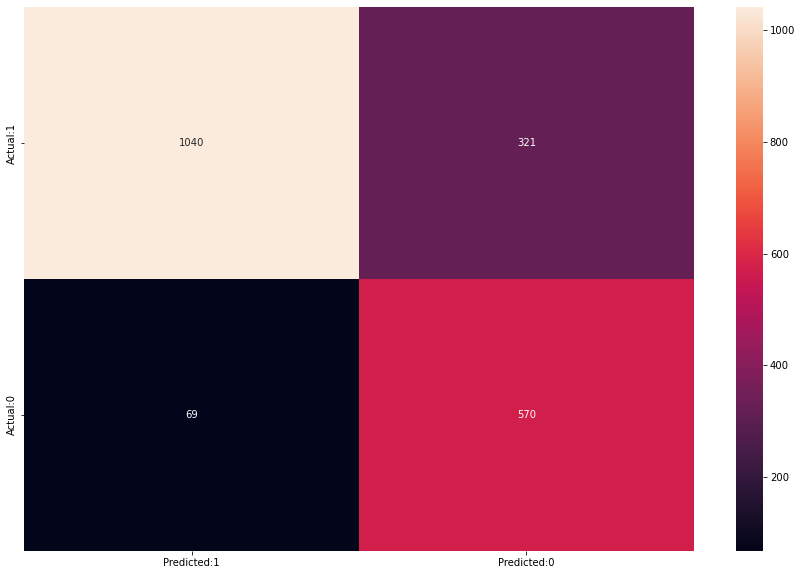

In [80]:
cm = confusion_matrix(Y_test, y_pred)

conf_mat=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:0'],index=['Actual:1','Actual:0'])
sns.heatmap(conf_mat,annot=True,fmt='d')

plt.show()

In [81]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

### Compute various performance metrics.

#### Precision

In [82]:
precision = TP / (TP+FP)

precision

0.6397306397306397

#### Recall

In [83]:
recall = TP / (TP+FN)
recall

0.892018779342723

#### Specificity

In [84]:
specificity = TN / (TN+FP)
specificity

0.7641440117560617

#### f1_score

In [85]:
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.7450980392156863

### Accuracy:

In [86]:
accuracy = (TN+TP) / (TN+FP+FN+TP)

accuracy

0.805

In [70]:
acc_table = classification_report(Y_test, y_pred)

print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1361
           1       0.76      0.70      0.73       639

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.81      2000
weighted avg       0.83      0.83      0.83      2000



### Kappa score:

In [87]:
kappa = cohen_kappa_score(Y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.5940253015923578


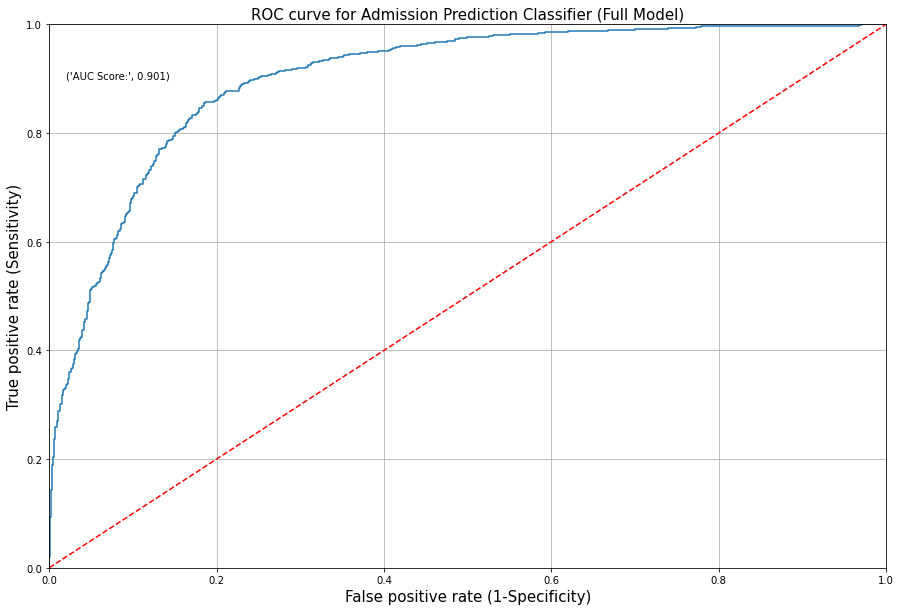

In [88]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)


plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_prob),4)))
                               

plt.grid(True)

## Create a generalized function to calculate the metrics for the train and the test set.¶

In [89]:
def get_train_report(model):
 
    train_pred = model.predict(X_train)

    return(classification_report(Y_train, train_pred))

In [90]:
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(Y_test, test_pred))

# Logistic Regression

In [92]:
clf_lr=LogisticRegression()

In [93]:
clf_lr.fit(X_train,Y_train)

LogisticRegression()

In [94]:
Logistic= (cross_val_score(estimator = clf_lr, X = X_train, y = Y_train, cv = 10).mean())

In [95]:
print('Score :',Logistic)

Score : 0.9449843546814044


### Precicting for the train set and calculating the accuracy

In [96]:
y_pred_lr_trn=clf_lr.predict(X_train)
print(f'Train Accuracy = {accuracy_score(Y_train,y_pred_lr_trn)}')

Train Accuracy = 0.9462869033684485


### Precicting for the test set and calculating the accuracy

In [97]:
y_pred_lr_tes=clf_lr.predict(X_test)
print(f'Test Accuracy = {accuracy_score(Y_test,y_pred_lr_tes)}')

Test Accuracy = 0.802


### classification report on train set

In [98]:
print(classification_report(Y_train,y_pred_lr_trn))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3486
           1       0.95      0.95      0.95      4203

    accuracy                           0.95      7689
   macro avg       0.95      0.95      0.95      7689
weighted avg       0.95      0.95      0.95      7689



In [99]:
print(classification_report(Y_test,y_pred_lr_tes))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1361
           1       0.64      0.89      0.74       639

    accuracy                           0.80      2000
   macro avg       0.79      0.83      0.79      2000
weighted avg       0.84      0.80      0.81      2000



# Confusion Matrix

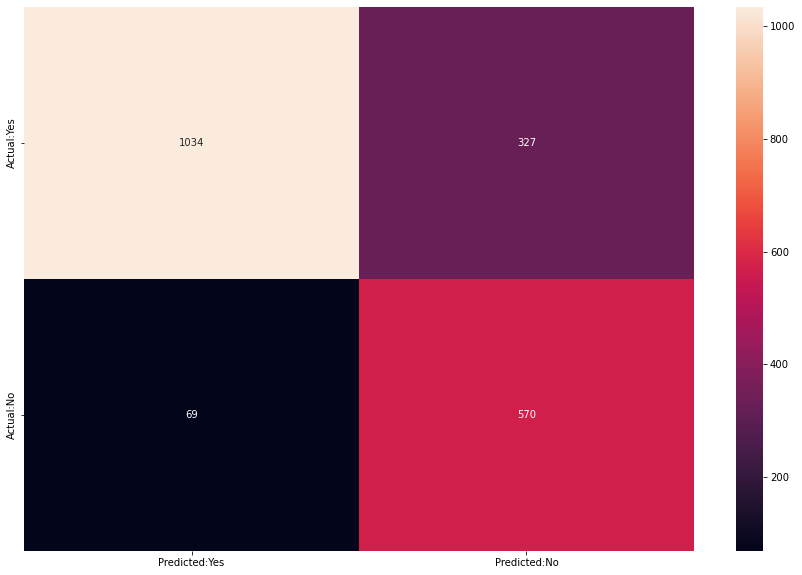

In [100]:
cm=confusion_matrix(Y_test,clf_lr.predict(X_test))
conf_mat=pd.DataFrame(data=cm,columns=['Predicted:Yes','Predicted:No'],index=['Actual:Yes','Actual:No'])
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.show()

In [101]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [102]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 89.2018779342723
False Positive Rate: 24.02645113886848
True Negative Rate: 75.97354886113152
False Negative Rate: 10.7981220657277


# Tune the Hyperparameters using GridSearchCV (Logistic Regression)

In [105]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.945764080786736


# Decision Tree for Classification

In [106]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train, Y_train)

In [107]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
predicted_value = model.predict(X_test)


In [108]:
DTC= (cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10).mean())

In [109]:
print('Score:',DTC)

Score: 0.9581221892609448


### Calculate performance measures on the train set.

In [110]:
train_report = get_train_report(decision_tree)

print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       1.00      1.00      1.00      4203

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689



### Calculate performance measures on the test set.

In [111]:
test_report = get_test_report(decision_tree)

print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1361
           1       0.65      0.84      0.73       639

    accuracy                           0.80      2000
   macro avg       0.78      0.81      0.79      2000
weighted avg       0.83      0.80      0.81      2000



### Interpretation:
From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

# Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [112]:
param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(X_train, Y_train)
print("Tuned Decision Tree Parameters with GridSearchCV: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters with GridSearchCV: {'criterion': 'gini', 'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.9245671359182641


## Build the model using the tuned hyperparameters.

In [113]:
y_pred_train = tree_cv.predict(X_train)
print(metrics.classification_report(Y_train, y_pred_train)) 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3486
           1       0.93      0.93      0.93      4203

    accuracy                           0.92      7689
   macro avg       0.92      0.92      0.92      7689
weighted avg       0.92      0.92      0.92      7689



In [114]:
y_pred_test = tree_cv.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_test)) 

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1361
           1       0.61      0.88      0.72       639

    accuracy                           0.78      2000
   macro avg       0.77      0.81      0.77      2000
weighted avg       0.83      0.78      0.79      2000



### Interpretation:
From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

# Recursive Feature Elimination (RFE)

In [115]:
logreg = LogisticRegression()

rfe_model = RFE(estimator = logreg, n_features_to_select = 35)

rfe_model = rfe_model.fit(X_train, Y_train)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['const', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'AGE_Old',
       'AGE_Very_Old', 'AGE_Young', 'GENDER_male', 'RACE_minority',
       'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_OWNERSHIP_owns vehicle', 'VEHICLE_YEAR_before 2015',
       'MARRIED_unmarried', 'CHILDREN_no child', 'VEHICLE_TYPE_sports car'],
      dtype='object')


In [116]:
RFE= (cross_val_score(estimator = rfe_model, X = X_train, y = Y_train, cv = 10).mean())

In [117]:
print('Score :',RFE)

Score : 0.9449843546814044


## Build the logisitc regression model using the variables obtained from RFE

In [118]:
logreg_rfe = sm.Logit(Y_train, X_train[['const', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'AGE_Old',
       'AGE_Very_Old', 'AGE_Young', 'GENDER_male', 'RACE_minority',
       'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_OWNERSHIP_owns vehicle', 'VEHICLE_YEAR_before 2015',
       'MARRIED_unmarried', 'CHILDREN_no child', 'VEHICLE_TYPE_sports car']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.148187
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                OUTCOME   No. Observations:                 7689
Model:                          Logit   Df Residuals:                     7664
Method:                           MLE   Df Model:                           24
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.7849
Time:                        16:31:29   Log-Likelihood:                -1139.4
converged:                       True   LL-Null:                       -5296.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.4519      0.257      9.558    

### AIC (Akaike Information Criterion) value.

In [119]:
print('AIC:', logreg_rfe.aic)

AIC: 2328.8237240515964


### predictions on the test set.

In [120]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[['const', 'CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'AGE_Old',
       'AGE_Very_Old', 'AGE_Young', 'GENDER_male', 'RACE_minority',
       'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_OWNERSHIP_owns vehicle', 'VEHICLE_YEAR_before 2015',
       'MARRIED_unmarried', 'CHILDREN_no child', 'VEHICLE_TYPE_sports car']])


y_pred_prob_rfe.head()

937    0.999281
9355   0.000046
2293   0.000094
192    0.347800
8675   0.993100
dtype: float64

In [121]:
y_pred_rfe = [ 0 if x < 0.6 else 1 for x in y_pred_prob_rfe]

## Confusion Matrix RFE Model

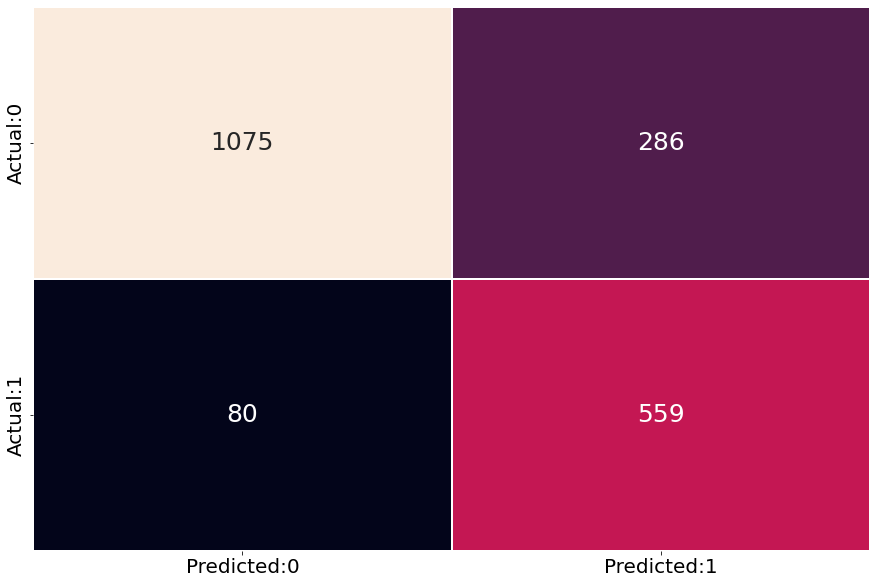

In [123]:
cm = confusion_matrix(Y_test, y_pred_rfe)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)


plt.show()

In [124]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [125]:
TPR=TP/(TP+FN)
print('True Positive Rate:',TPR*100)

FPR=FP/(FP+TN)
print('False Positive Rate:',FPR*100)

TNR=TN/(TN+FP)
print('True Negative Rate:',TNR*100)

FNR=FN/(FN+TP)
print('False Negative Rate:',FNR*100)

True Positive Rate: 87.48043818466354
False Positive Rate: 21.0139603232917
True Negative Rate: 78.9860396767083
False Negative Rate: 12.519561815336463


### Performance Measures : RFE model

In [126]:
result = classification_report(Y_test, y_pred_rfe)

print(result)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1361
           1       0.66      0.87      0.75       639

    accuracy                           0.82      2000
   macro avg       0.80      0.83      0.80      2000
weighted avg       0.84      0.82      0.82      2000



### kappa value : RFE Model

In [127]:
kappa = cohen_kappa_score(Y_test, y_pred_rfe)

print('kappa value:',kappa)

kappa value: 0.6123066167396682


### ROC curve: RFE Model

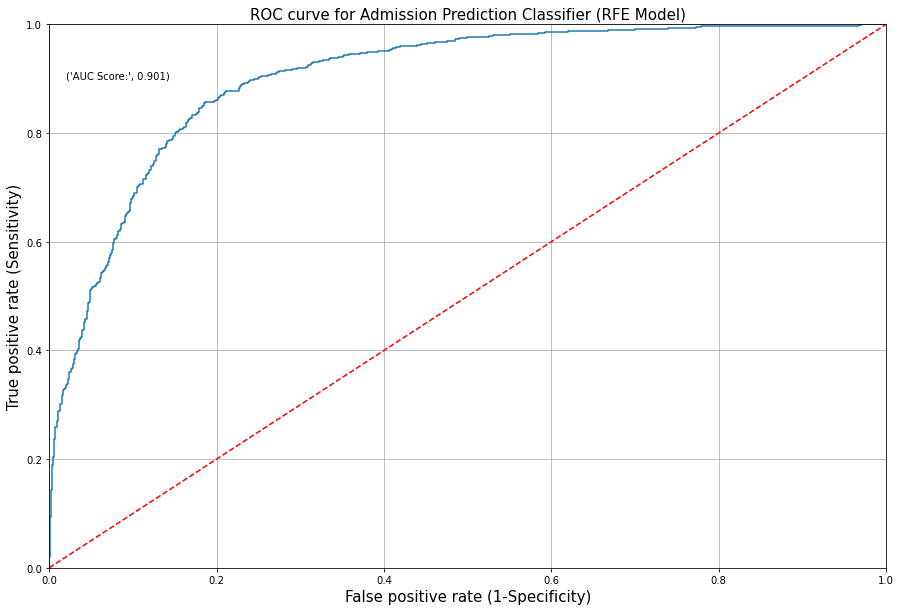

In [128]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_rfe)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_prob_rfe),4)))

plt.grid(True)

# Random Forest for Classification

In [130]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, Y_train)
RFC= (cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 10).mean())
print('Score:',RFC)

Score: 0.9719083563610749


### Performance measures on the train set.¶

In [131]:
train_report = get_train_report(rf_model)

print(train_report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3486
           1       1.00      1.00      1.00      4203

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689



In [132]:
test_report = get_test_report(rf_model)

print(test_report) 

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1361
           1       0.66      0.84      0.74       639

    accuracy                           0.81      2000
   macro avg       0.79      0.82      0.79      2000
weighted avg       0.83      0.81      0.81      2000



## Interpretation:
From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the Random Forest for Classification is over-fitted on the train data.

If we tune the hyperparameters in the Random Forest for Classification, it helps to avoid the over-fitting of the Random Forest for Classification.

### Tune the Hyperparameters using GridSearchCV (Random Forest)¶

In [ ]:
param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}

random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(random_forest_classification, param_dist, cv = 5)
rf_grid.fit(X_train, Y_train)
print("Tuned Random Forest Parameters with GridSearchCV: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))

### Build the model using the tuned hyperparameters.

In [ ]:
y_pred_train_re = rf_grid.predict(X_train)
print(metrics.classification_report(Y_train, y_pred_train_re)) 

In [ ]:
y_pred_test_re = rf_grid.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_test_re)) 

# XGBClassifier

In [138]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_prd_xgb = xgb.predict(X_test)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = Y_train, cv = 10).mean())
print(XGB)

0.976330868010403


In [142]:
y_pred_test_XGB = xgb.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_test_XGB))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1361
           1       0.67      0.85      0.75       639

    accuracy                           0.82      2000
   macro avg       0.80      0.83      0.81      2000
weighted avg       0.84      0.82      0.82      2000



# Important features to the model¶

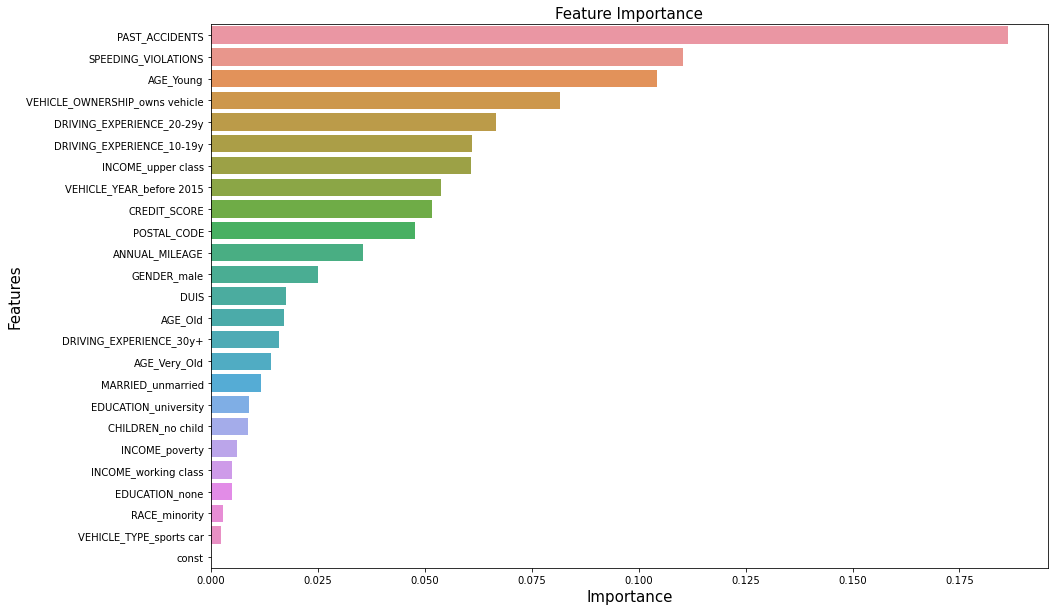

In [134]:
important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Accuracy of all models

In [137]:
models_score= pd.DataFrame({'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Model','XGBClassifier'],
                'Score':  [RFC, DTC,Logistic,XGB]})

models_score.sort_values(by='Score', ascending=False)

,Models,Score
3,XGBClassifier,0.976331
0,Random Forest Classifier,0.971908
1,Decision Tree Classifier,0.958122
2,Logistic Model,0.944984


## BEST MODEL : XGBClassifier	

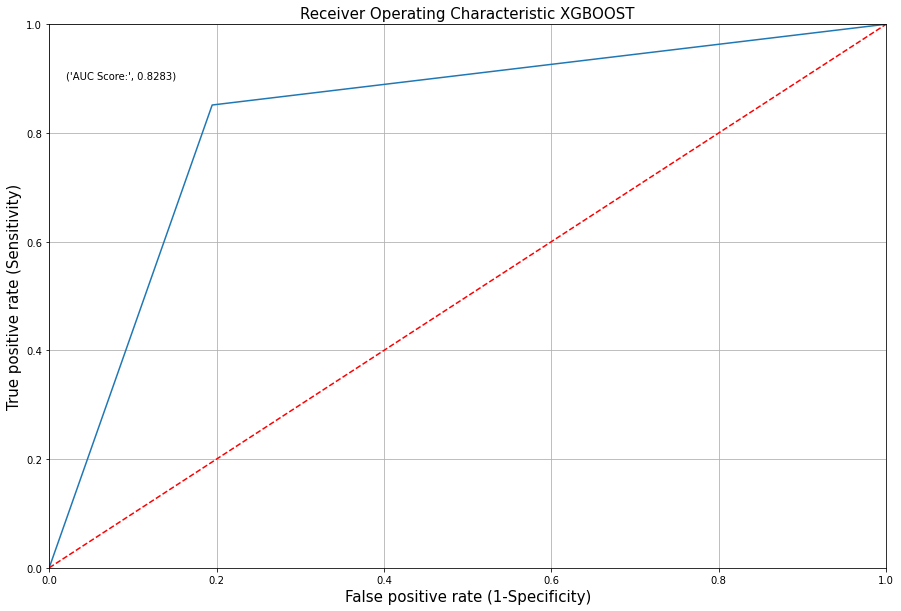

In [145]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test_XGB)
probs = xgb.predict_proba(X_test)
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('Receiver Operating Characteristic XGBOOST', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_test_XGB),4)))

plt.grid(True)